In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Superstore.csv", encoding="ISO-8859-1")


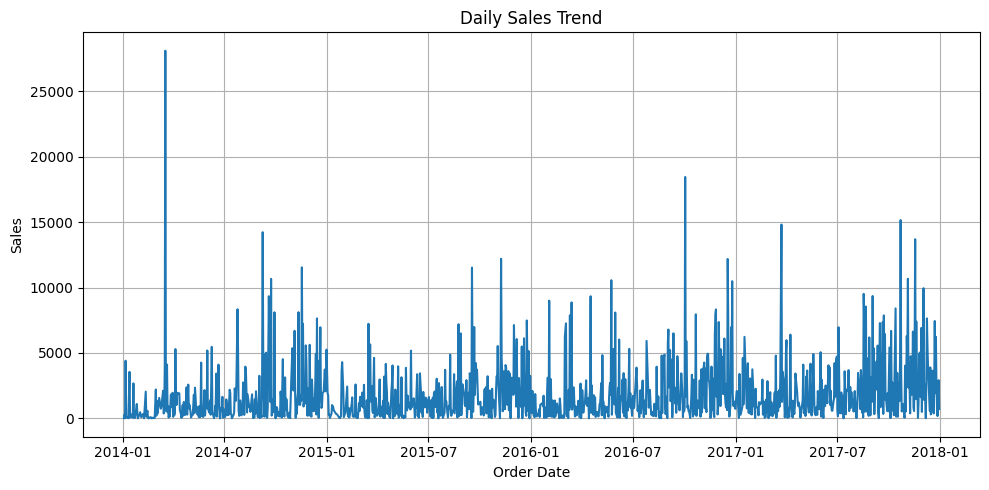

In [2]:
#Line Plot: Total Sales Over Order Date

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by date and sum sales
daily_sales = df.groupby('Order Date')['Sales'].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('daily_sales_line_plot.png', dpi=300)
plt.show()


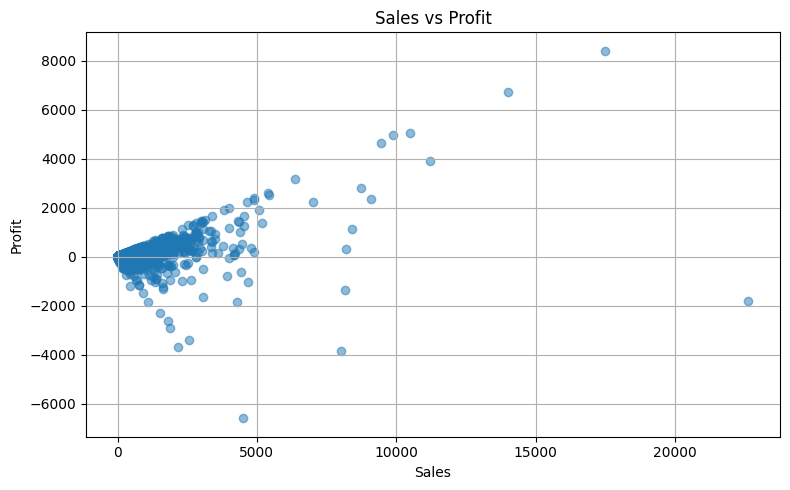

In [4]:
#Scatter Plot: Sales vs Profit
plt.figure(figsize=(8, 5))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.savefig('sales_vs_profit_scatter.png', dpi=300)
plt.show()


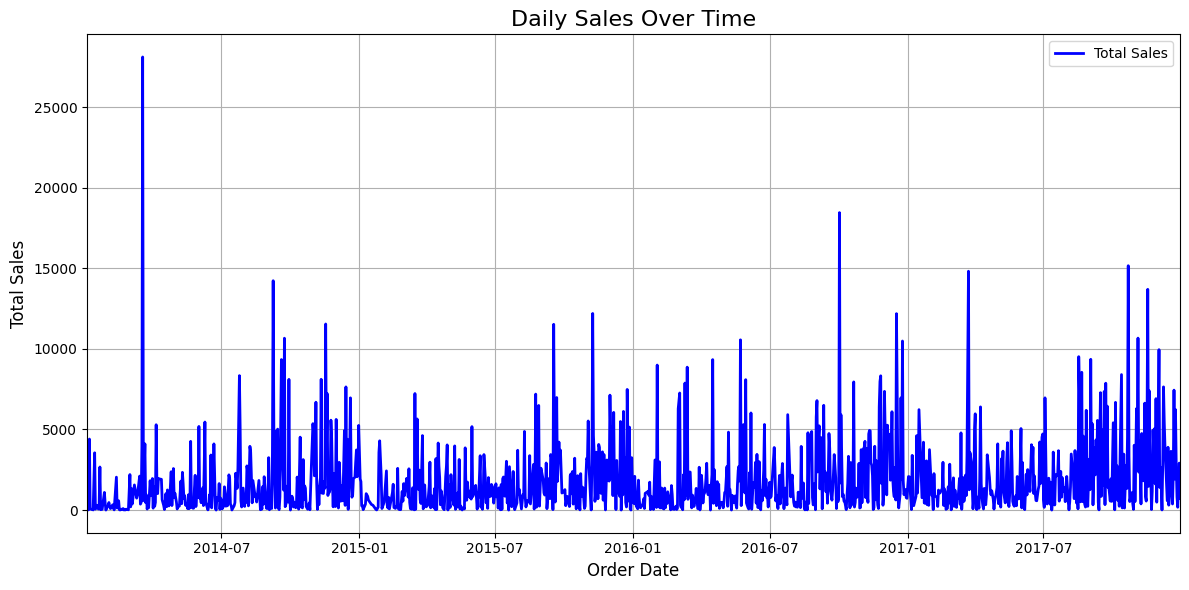

In [5]:
#Customized Line Plot: Daily Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='blue', linewidth=2, label='Total Sales')

# Customizations
plt.title('Daily Sales Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(daily_sales.index.min(), daily_sales.index.max())
plt.tight_layout()
plt.savefig('custom_daily_sales_line.png', dpi=300)
plt.show()


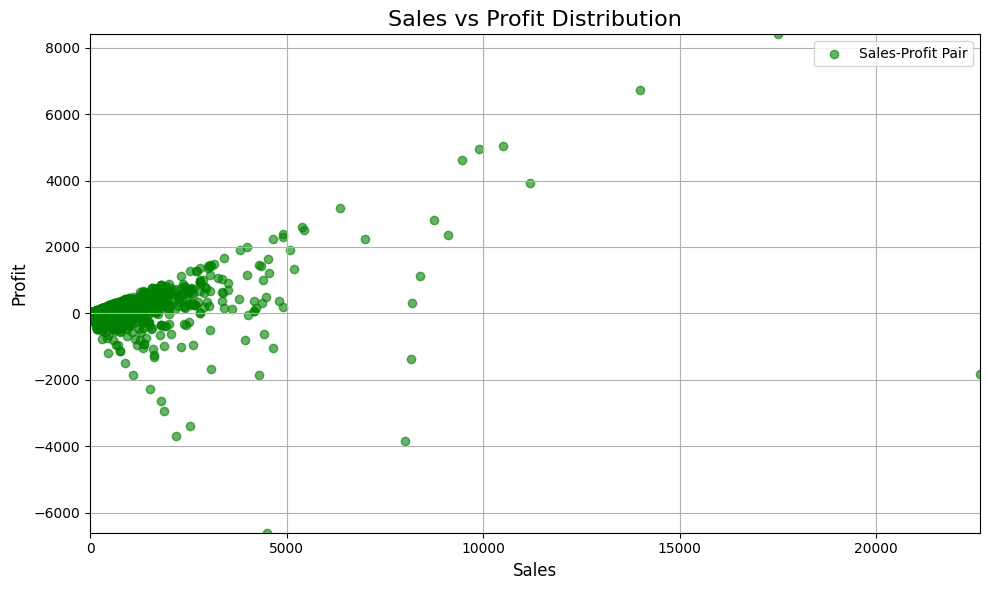

In [6]:
#Customized Scatter Plot: Sales vs Profit
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.6, color='green', label='Sales-Profit Pair')

# Customizations
plt.title('Sales vs Profit Distribution', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(0, df['Sales'].max())
plt.ylim(df['Profit'].min(), df['Profit'].max())
plt.tight_layout()
plt.savefig('custom_sales_profit_scatter.png', dpi=300)
plt.show()


In [7]:
#Seaborn Introduction
import seaborn as sns


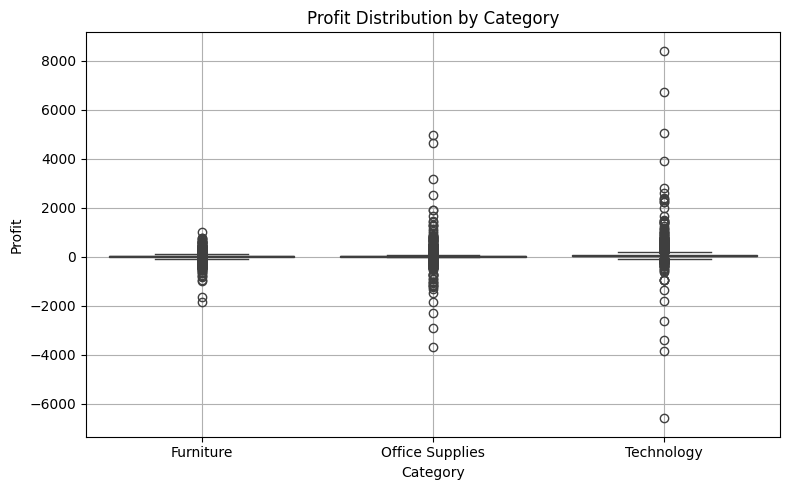

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.savefig('boxplot_profit_by_category.png', dpi=300)
plt.show()


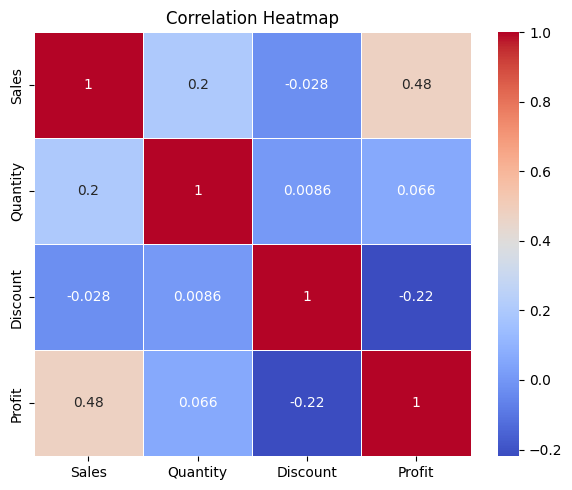

In [9]:
#Heatmap: Correlation Matrix

# Compute correlation matrix on numeric columns
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()


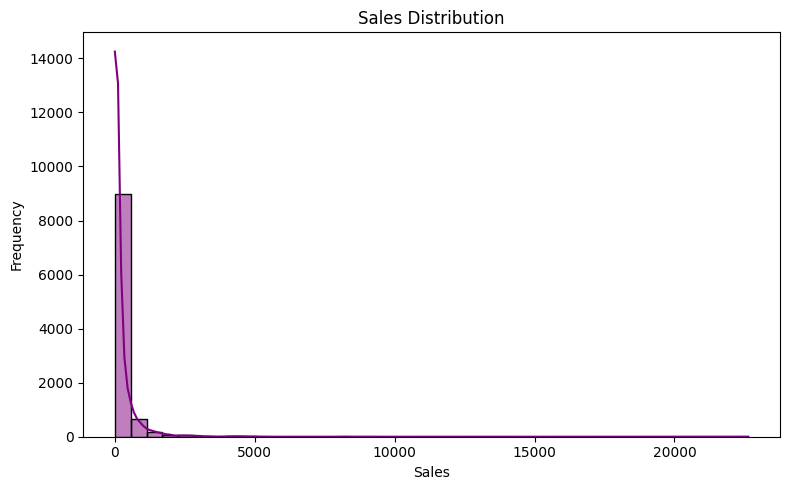

In [10]:
#Histogram: Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=40, kde=True, color='purple')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('sales_histogram.png', dpi=300)
plt.show()


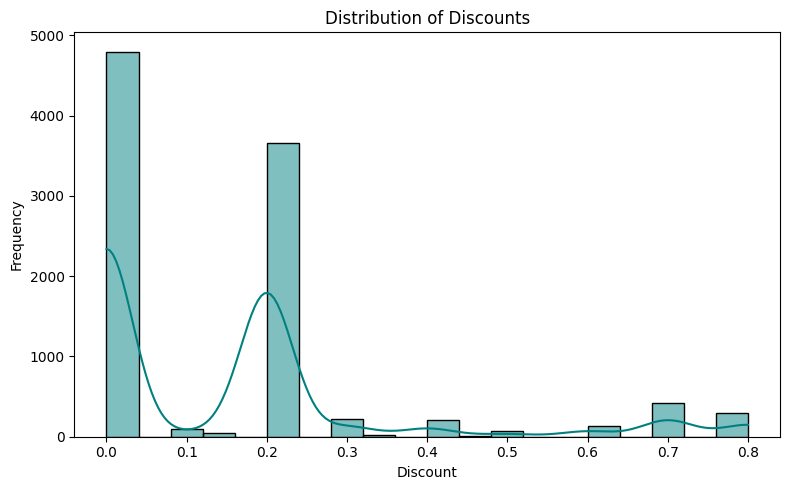

In [11]:
#Histogram: Distribution of Discount
plt.figure(figsize=(8, 5))
sns.histplot(df['Discount'], bins=20, color='teal', kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histogram_discount.png', dpi=300)
plt.show()


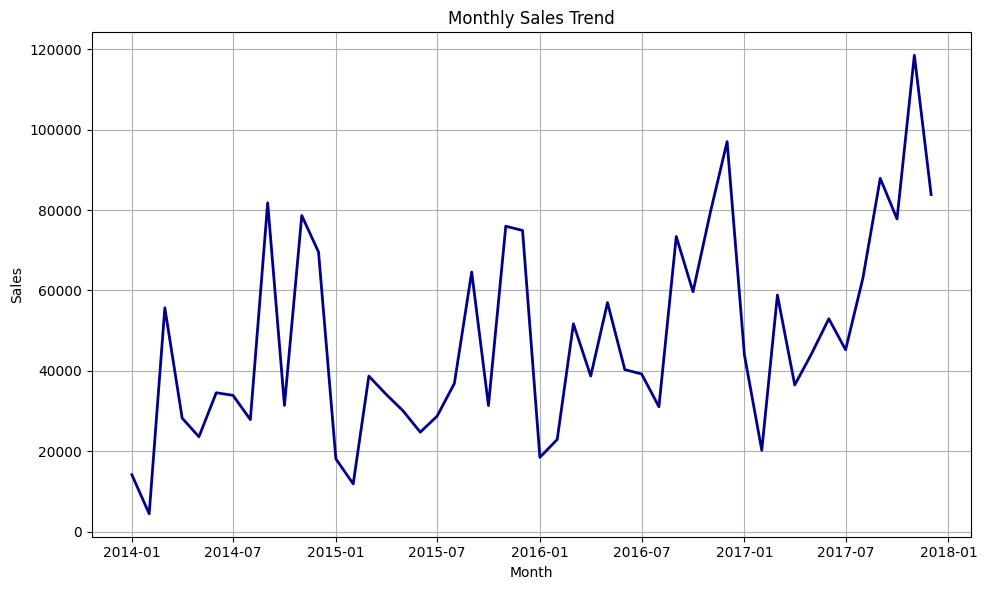

In [12]:
#Line Plot: Monthly Sales Trend
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], color='darkblue', linewidth=2)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=300)
plt.show()



/tmp/ipython-input-13-4000944178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_profit.values, y=subcategory_profit.index, palette='Spectral')


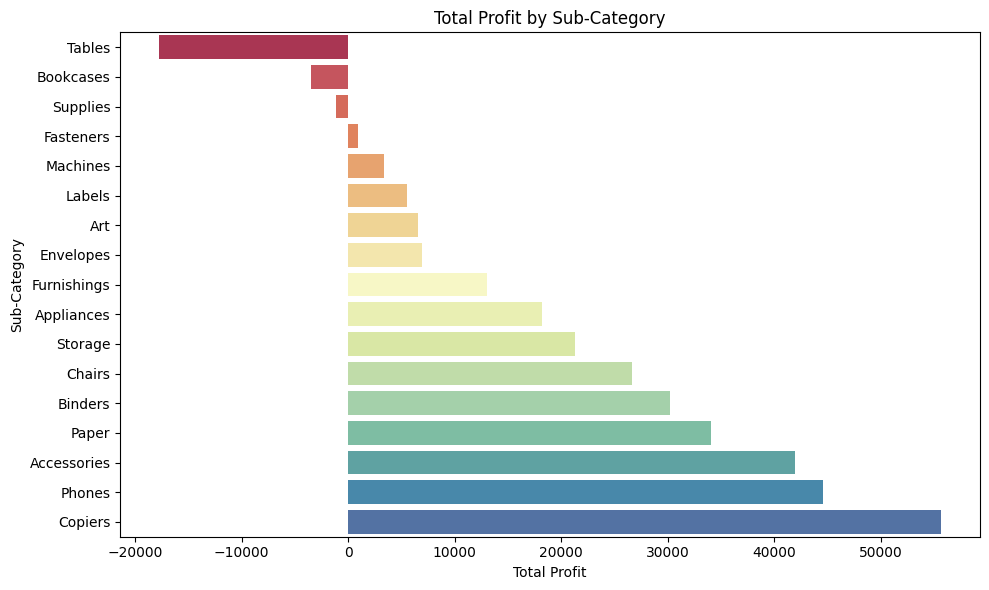

In [13]:
#Category Comparison: Profit by Sub-Category (Bar Chart)
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=subcategory_profit.values, y=subcategory_profit.index, palette='Spectral')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.savefig('bar_profit_by_subcategory.png', dpi=300)
plt.show()


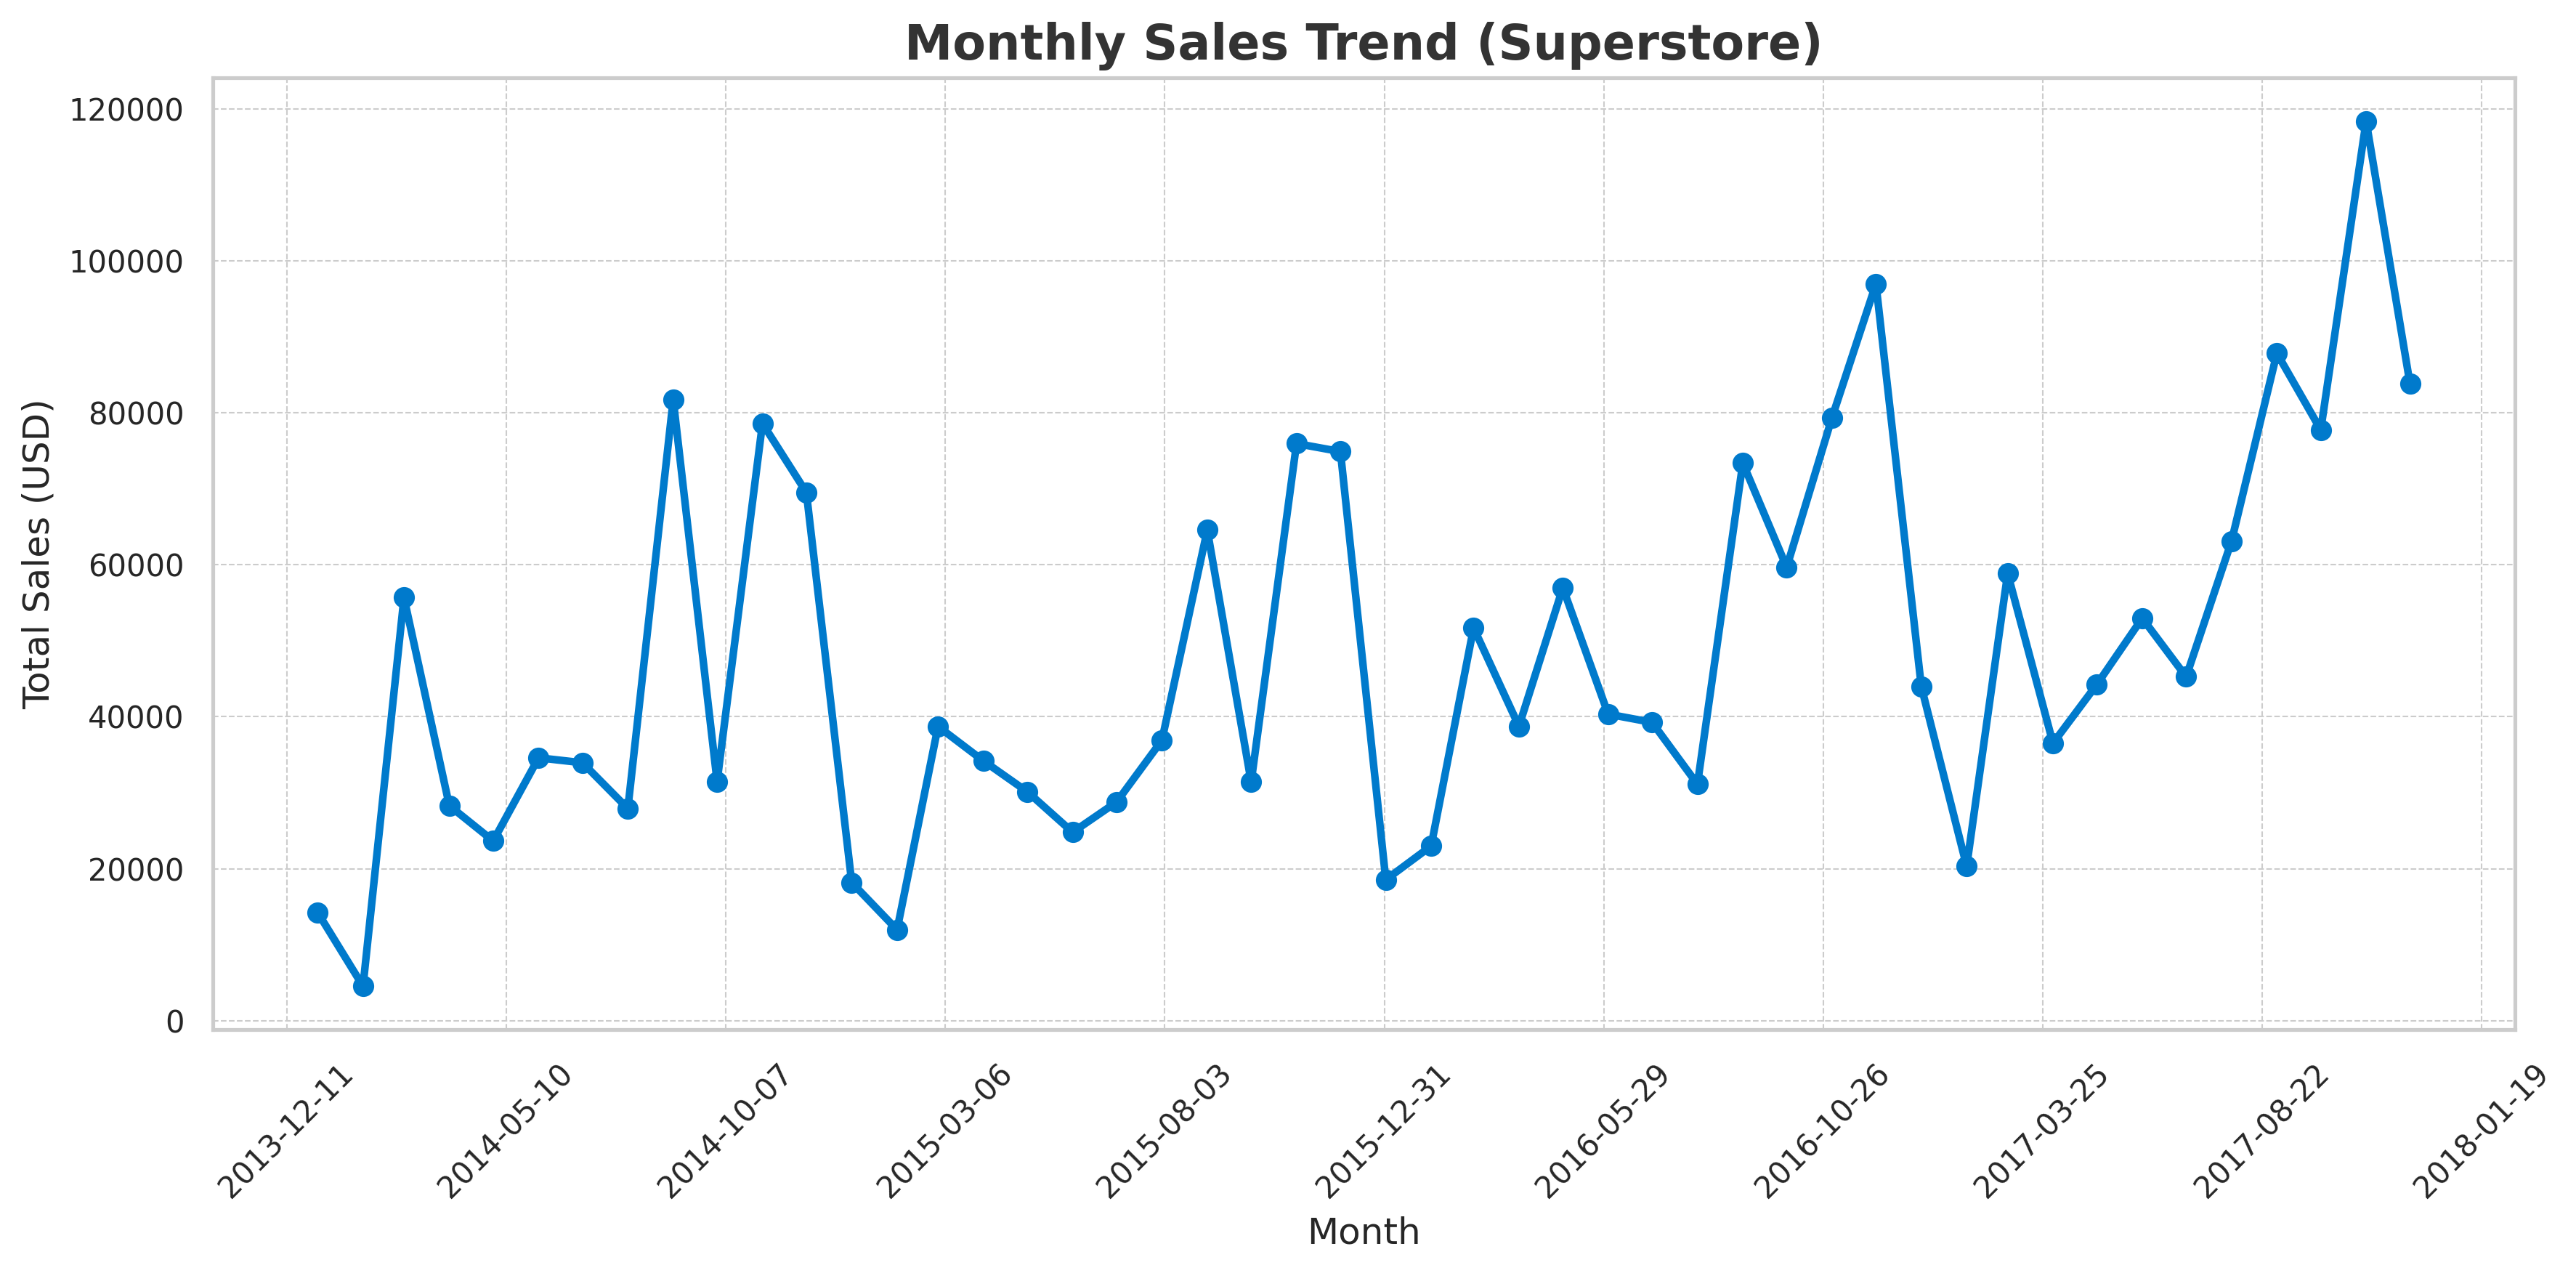

In [15]:
#High-Quality Line Plot: Monthly Sales Trend
import matplotlib.ticker as ticker

# Prepare monthly sales data
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Set style
sns.set(style="whitegrid")

# Create high-quality figure
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# Plot line with custom color and thickness
ax.plot(monthly_sales['Order Date'], monthly_sales['Sales'], color="#007acc", linewidth=2.5, marker='o')

# Titles and labels with font styles
ax.set_title('Monthly Sales Trend (Superstore)', fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Sales (USD)', fontsize=12)

# Customize axis ticks
ax.xaxis.set_major_locator(ticker.MaxNLocator(12))
plt.xticks(rotation=45)
ax.tick_params(axis='both', labelsize=10)

# Grid and layout
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save high-resolution figure
plt.savefig('publish_quality_monthly_sales.png', dpi=300)
plt.show()
